# 2. Customizations

This chapter discusses the various customizations that can be applied to `cornerhex.cornerplot`. For this puporse we create random data with 50000 samples and 5 features.

In [1]:
Ndims, Nsamples = 5, 50_000

In [2]:
import numpy as np

D = 2.*np.random.rand(Ndims, Ndims)-1.
cov = np.dot(D, D.T)
mean = 20.*np.random.rand(Ndims) - 10.

data = np.random.multivariate_normal(mean, cov, size=Nsamples)

## Adding feature labels

It is possible to add labels of the data features. `LaTeX` notion is allowed. We simply call the features $X_i$ here.

In [3]:
labels = ["$X_{{{}}}$".format(i+1) for i in range(Ndims)]

In [4]:
from cornerhex import cornerplot

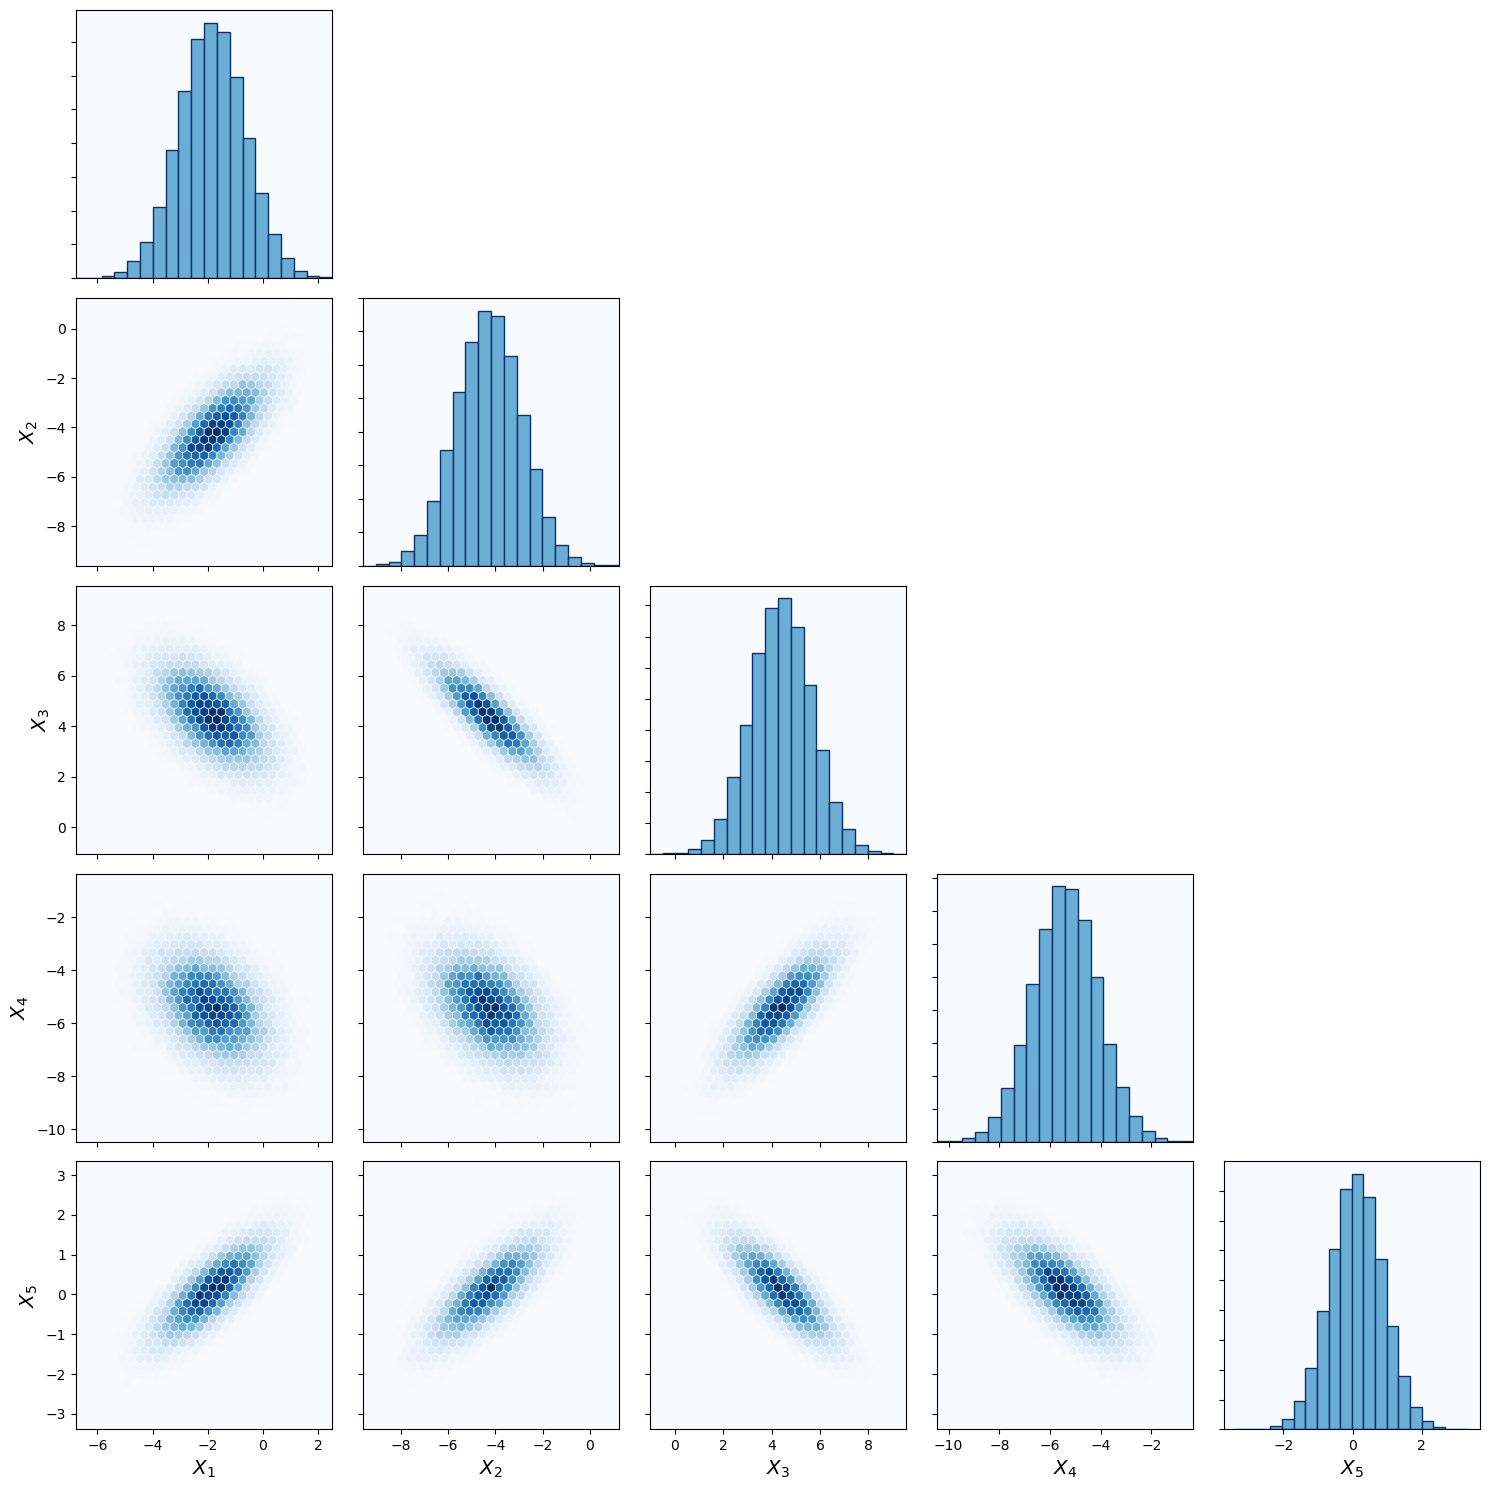

In [5]:
cornerplot(
    data,
    labels=labels
);

## Modifying number of bins

The number bins in the histgram and the number of hexbins in $x$-direction can be modified with the `hist_bins` and `hex_gridsize` keywords. Default values are 20 and 30 respectively.

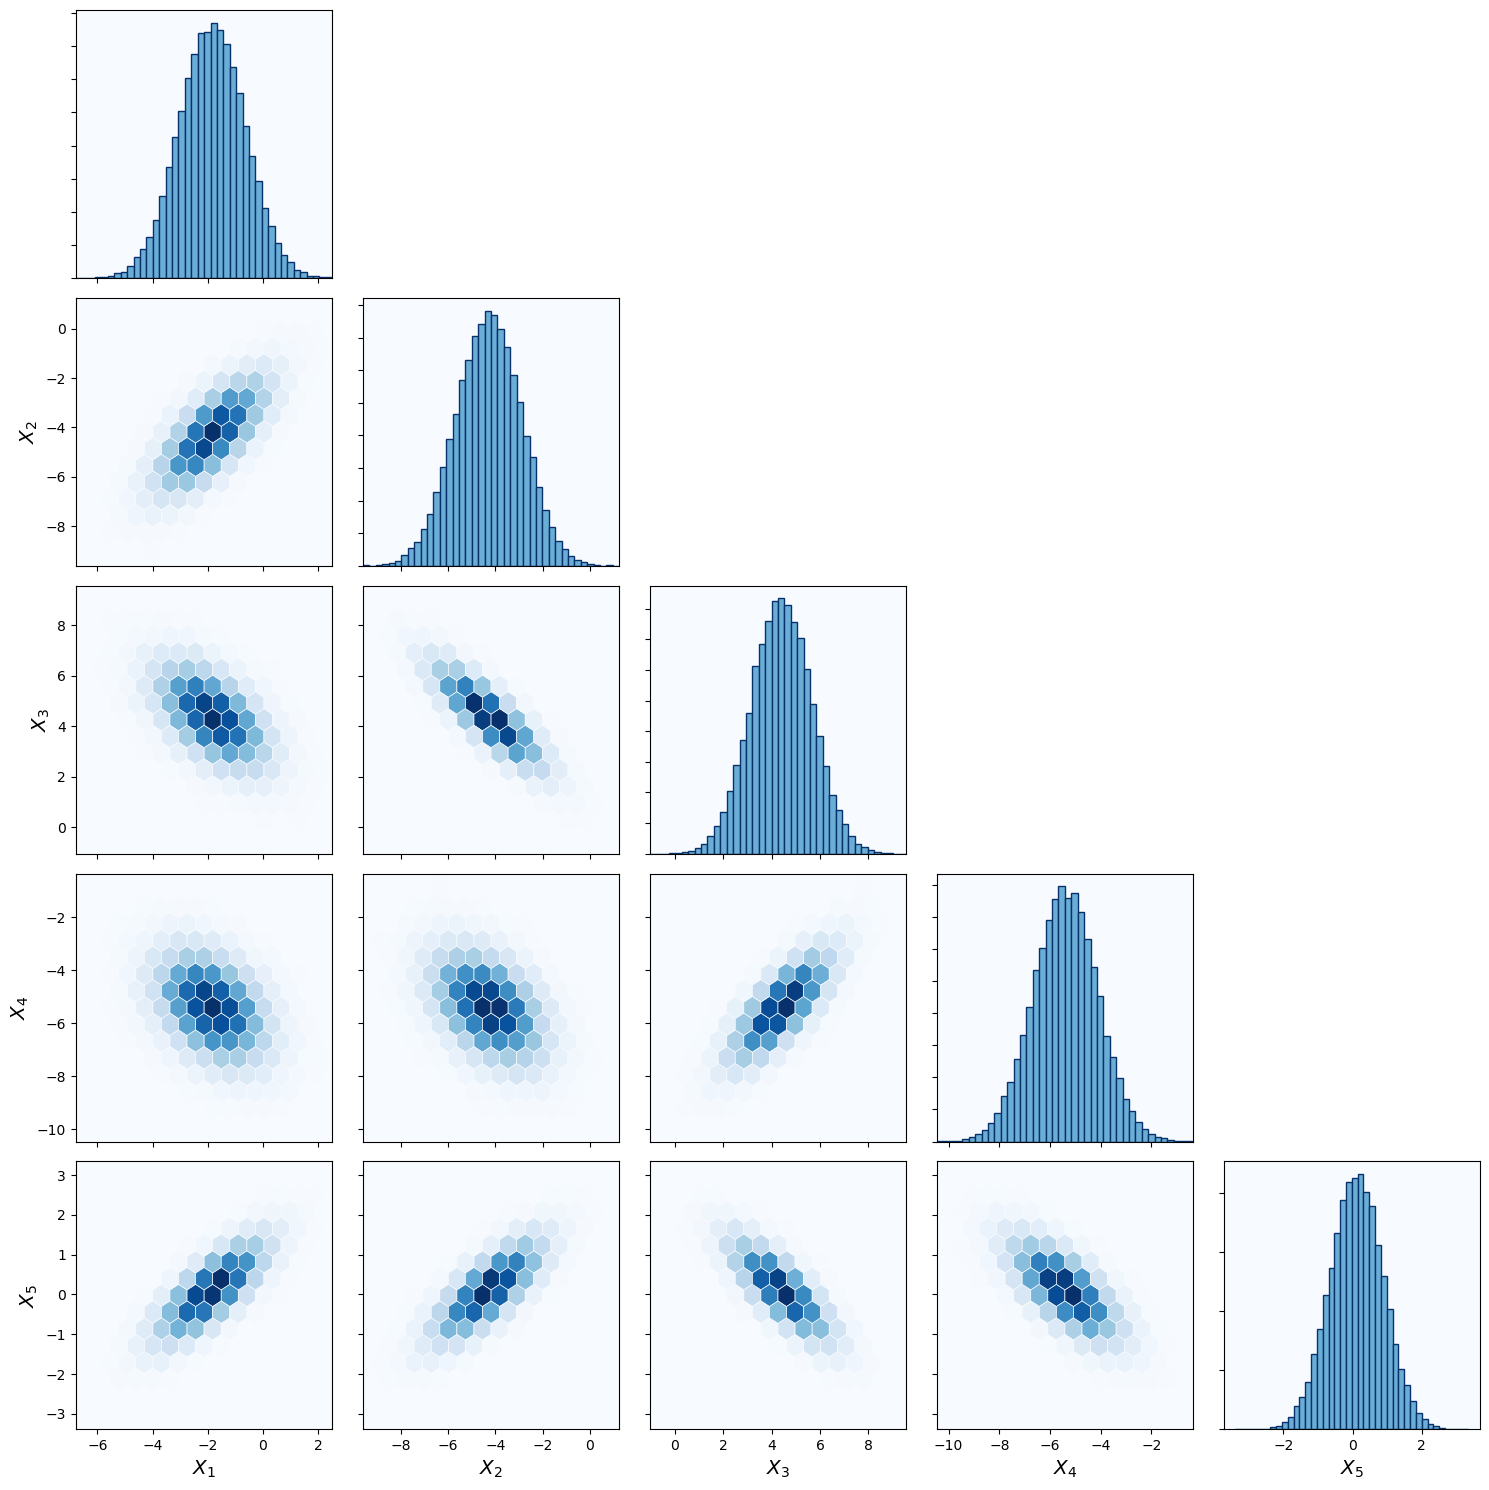

In [6]:
cornerplot(
    data,
    hex_gridsize=15,
    hist_bins=40,
    labels=labels
);

## Highlighting specific values

It is often usefull to highlight specific values in the corner plot. In this example we want to highlight the true mean values of the features that we have randomly picked above.

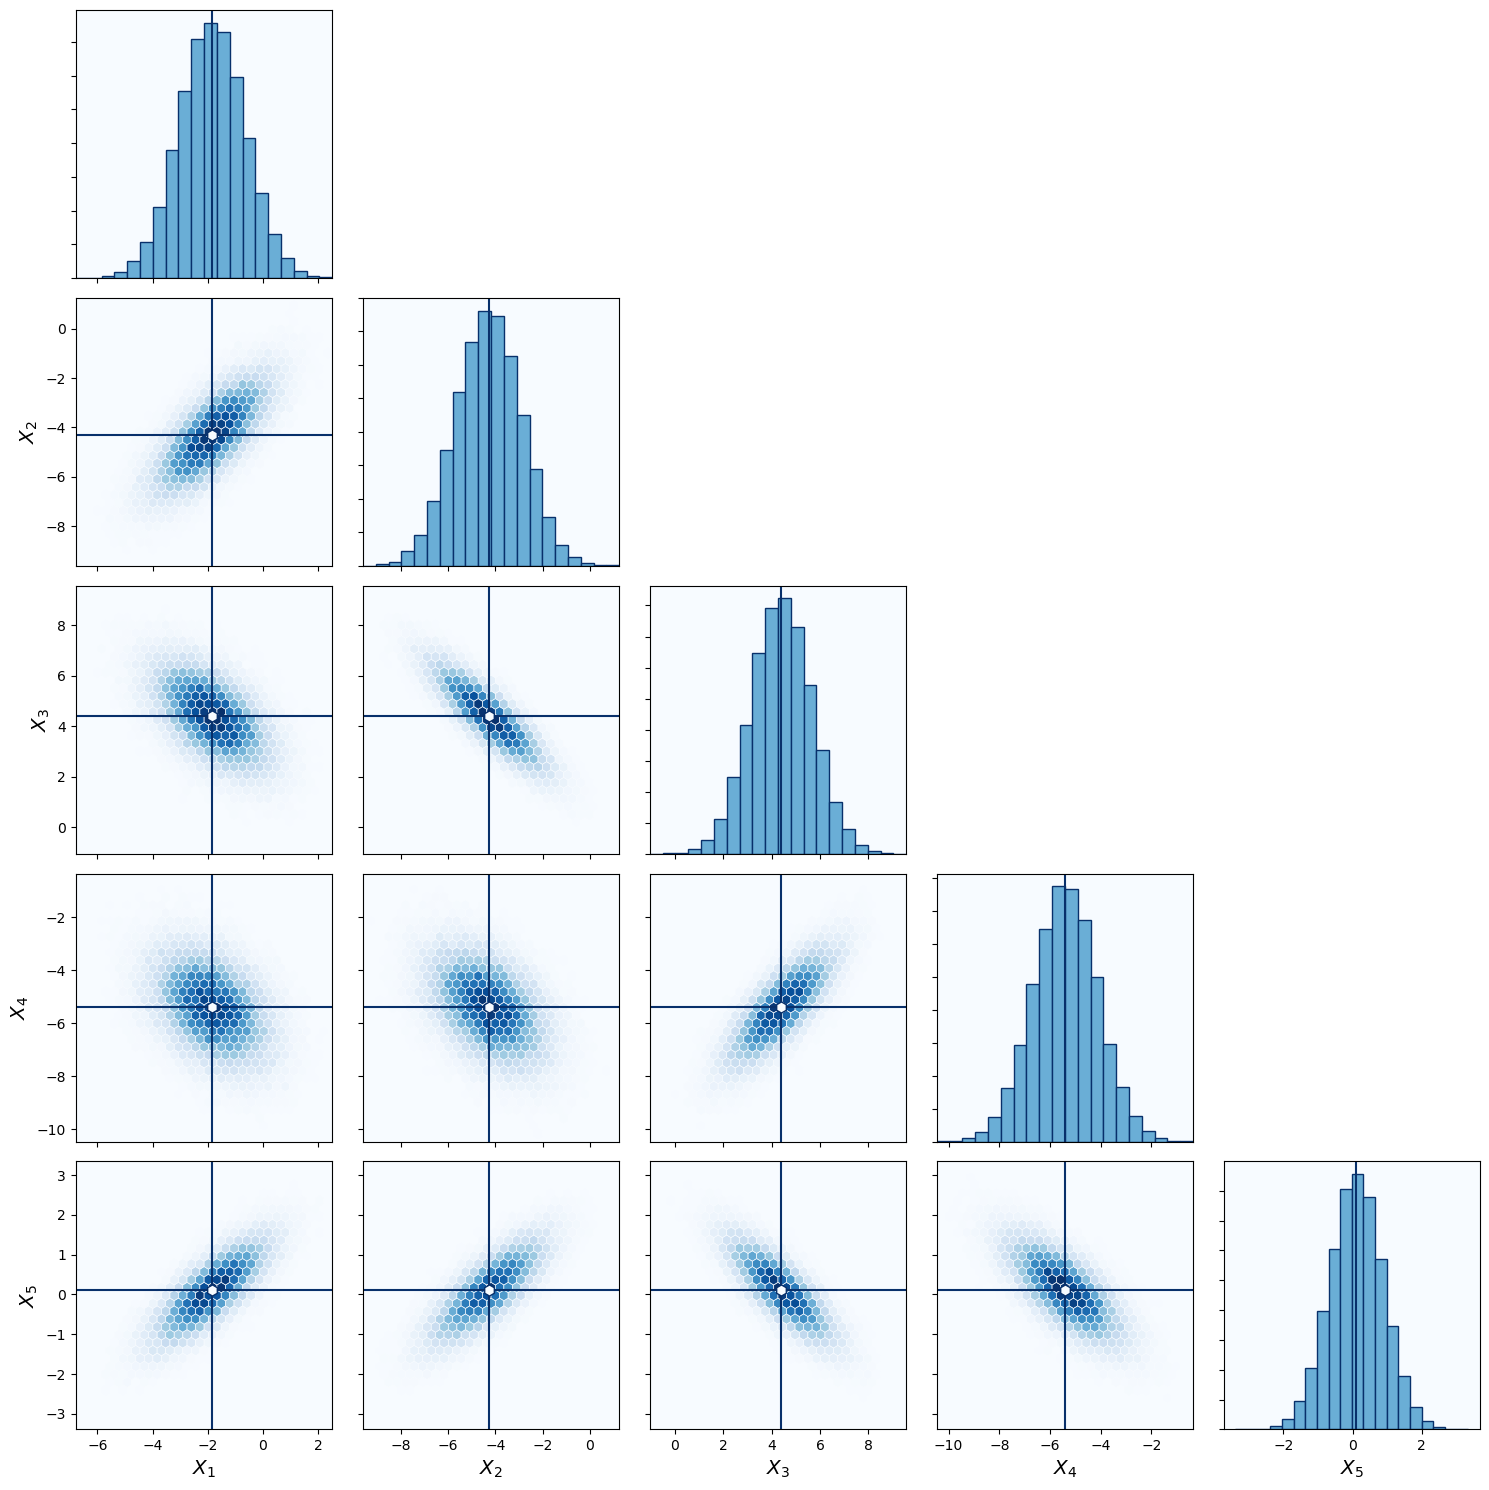

In [7]:
cornerplot(
    data,
    highlight=mean,
    labels=labels
);

## Adding $\sigma$ contour levels

It is additionally possible to add contour lines of the $\sigma$ levels of the data. In this example we want to display the $1\sigma$ and $2\sigma$ levels. Plotting the contour lines requires smoothing the hexbin histogram data. This can be accessed via the `sigma_smooth` keyword. default value is 3.

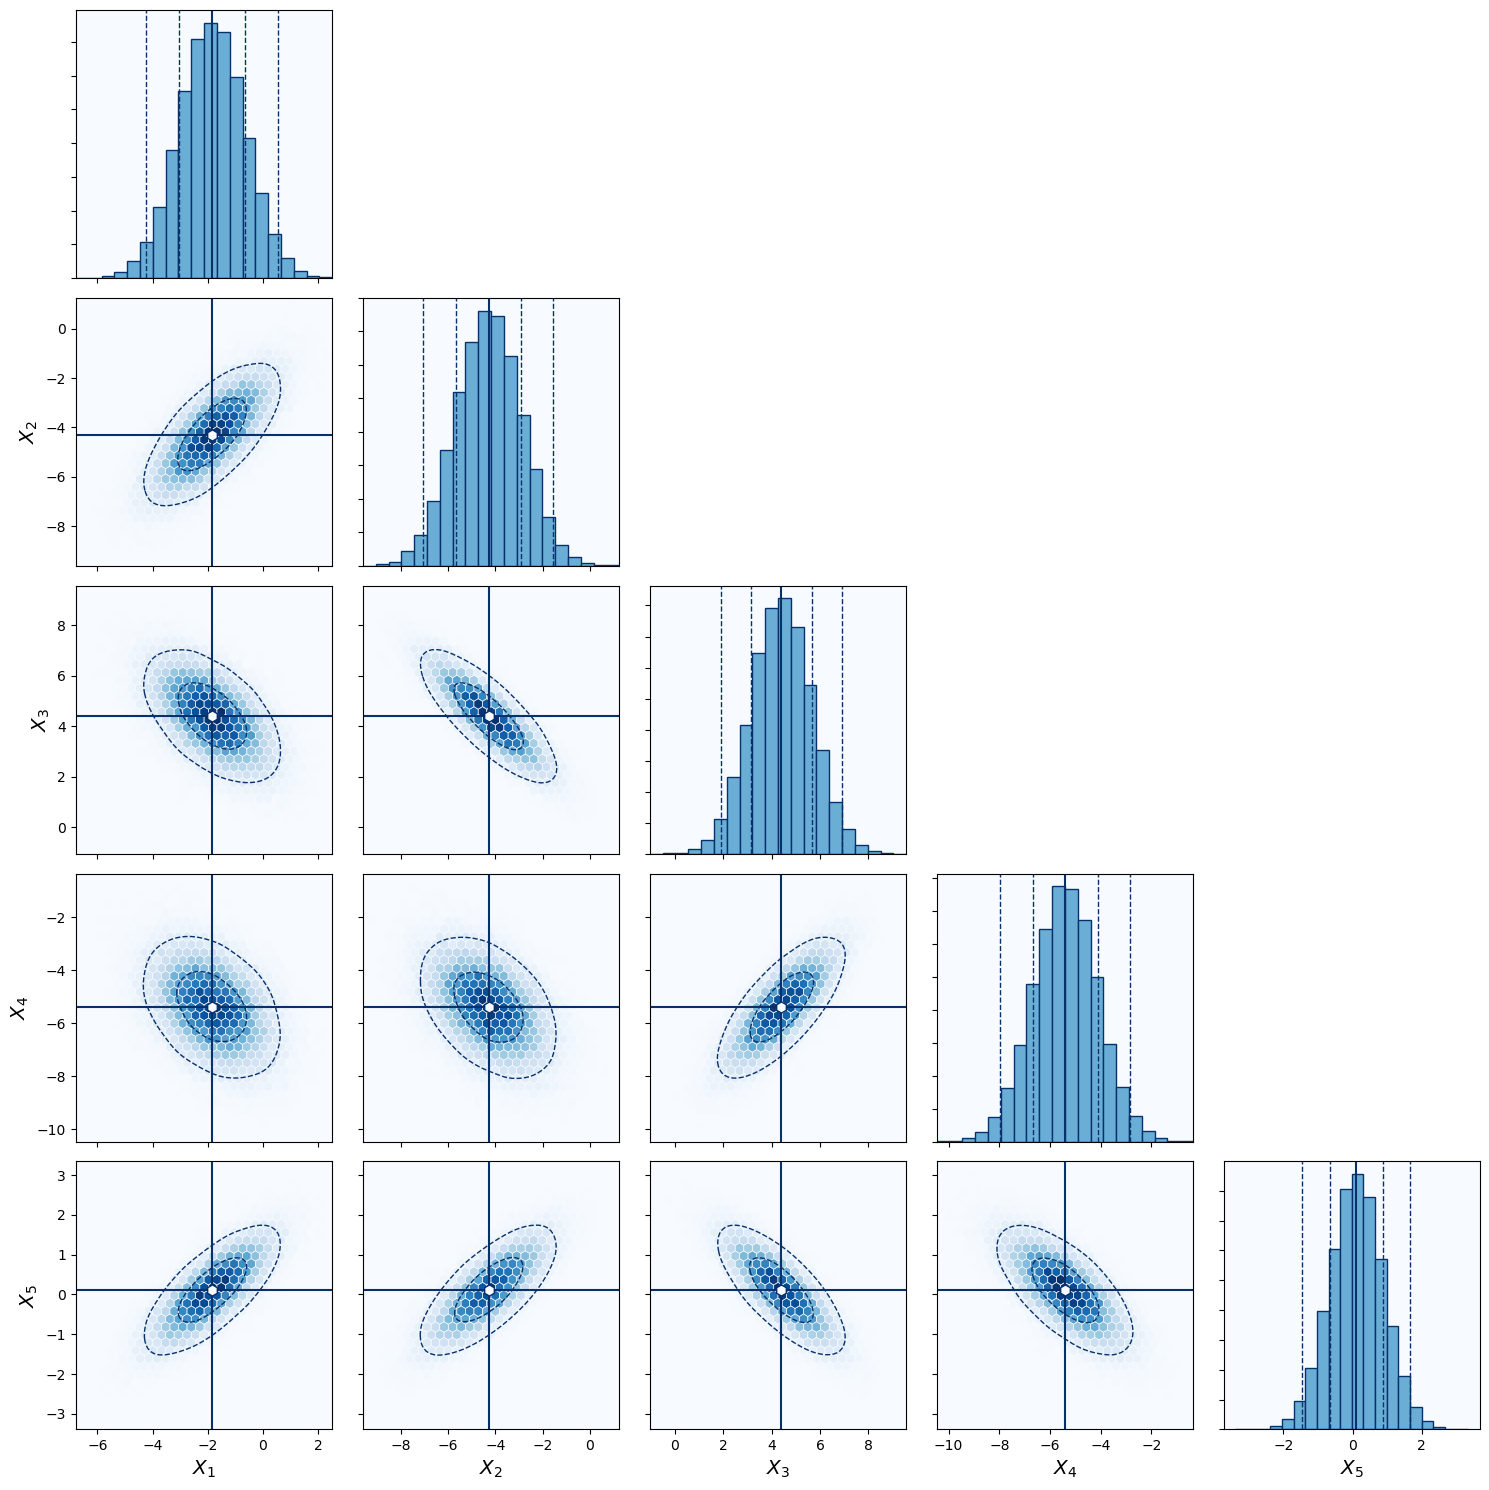

In [8]:
cornerplot(
    data,
    highlight=mean,
    labels=labels,
    sigma_levels=[1., 2.],
    sigma_smooth=3.
);

## Displaying quantiles

It is possible to specific quantiles as title of the histograms. In this example we want to display the mean values of the features computed from the dataset. The mean values is the `[50]` quantile.

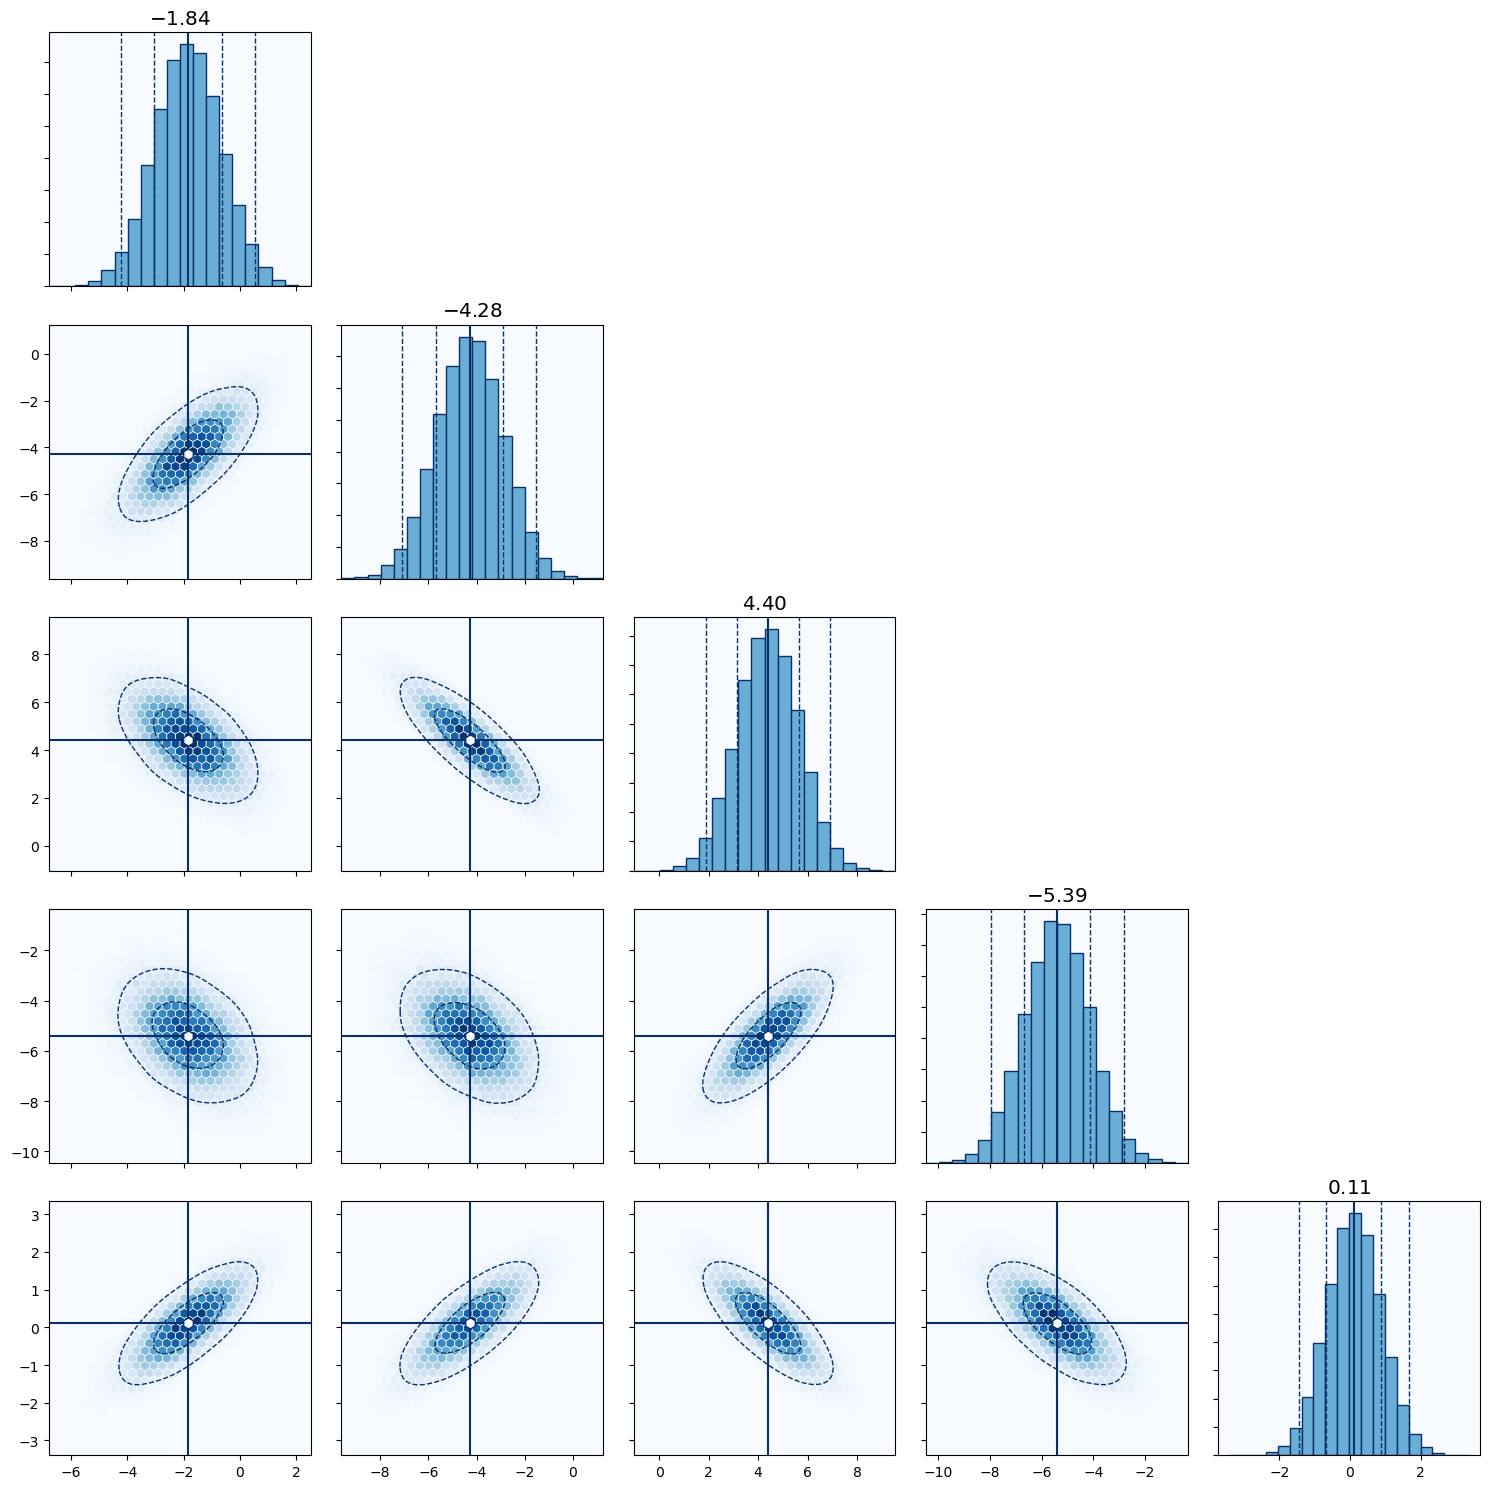

In [9]:
cornerplot(
    data,
    highlight=mean,
    sigma_levels=[1., 2.],
    sigma_smooth=3.,
    title_quantiles=[50]
);

Additionally we can plot the $1\sigma$ intervals of the mean. For this we need to now what the $1\sigma$ quantiles of a normal distributions are. We utilize the helper function `cornerhex.sigma_to_quantile` for this purpose.

In [10]:
from cornerhex import sigma_to_quantile

quantiles = [50-sigma_to_quantile(1.), 50, 50+sigma_to_quantile(1.)]

If the feature `labels` are given they will be displayed in the title as well.

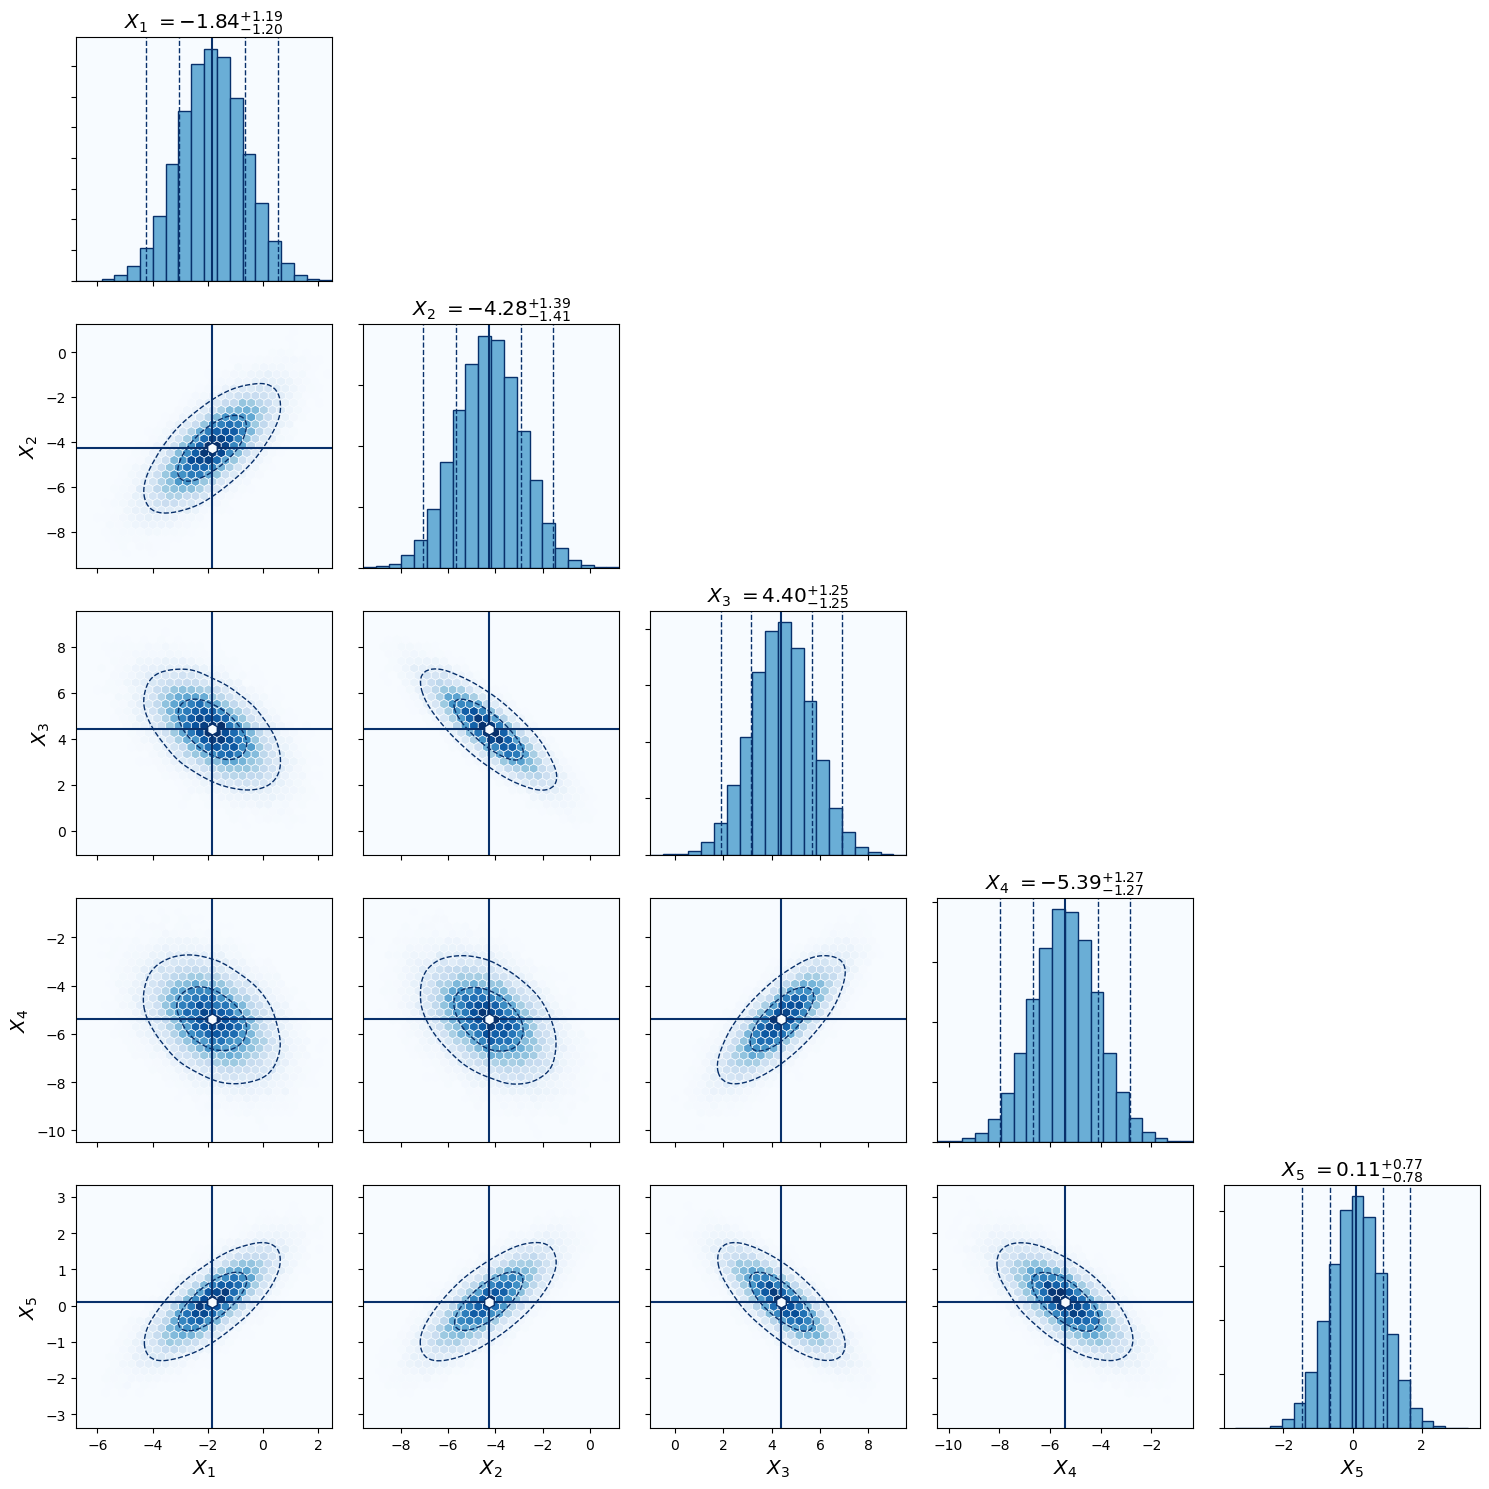

In [11]:
cornerplot(
    data,
    highlight=mean,
    labels=labels,
    sigma_levels=[1., 2.],
    sigma_smooth=3.,
    title_quantiles=quantiles
);

## Displaying Pearson correlation coefficient

It is furthermore possible to display the Pearson correlation coefficient $\rho$ in each hexbin plot with the `show_correlations` keyword.

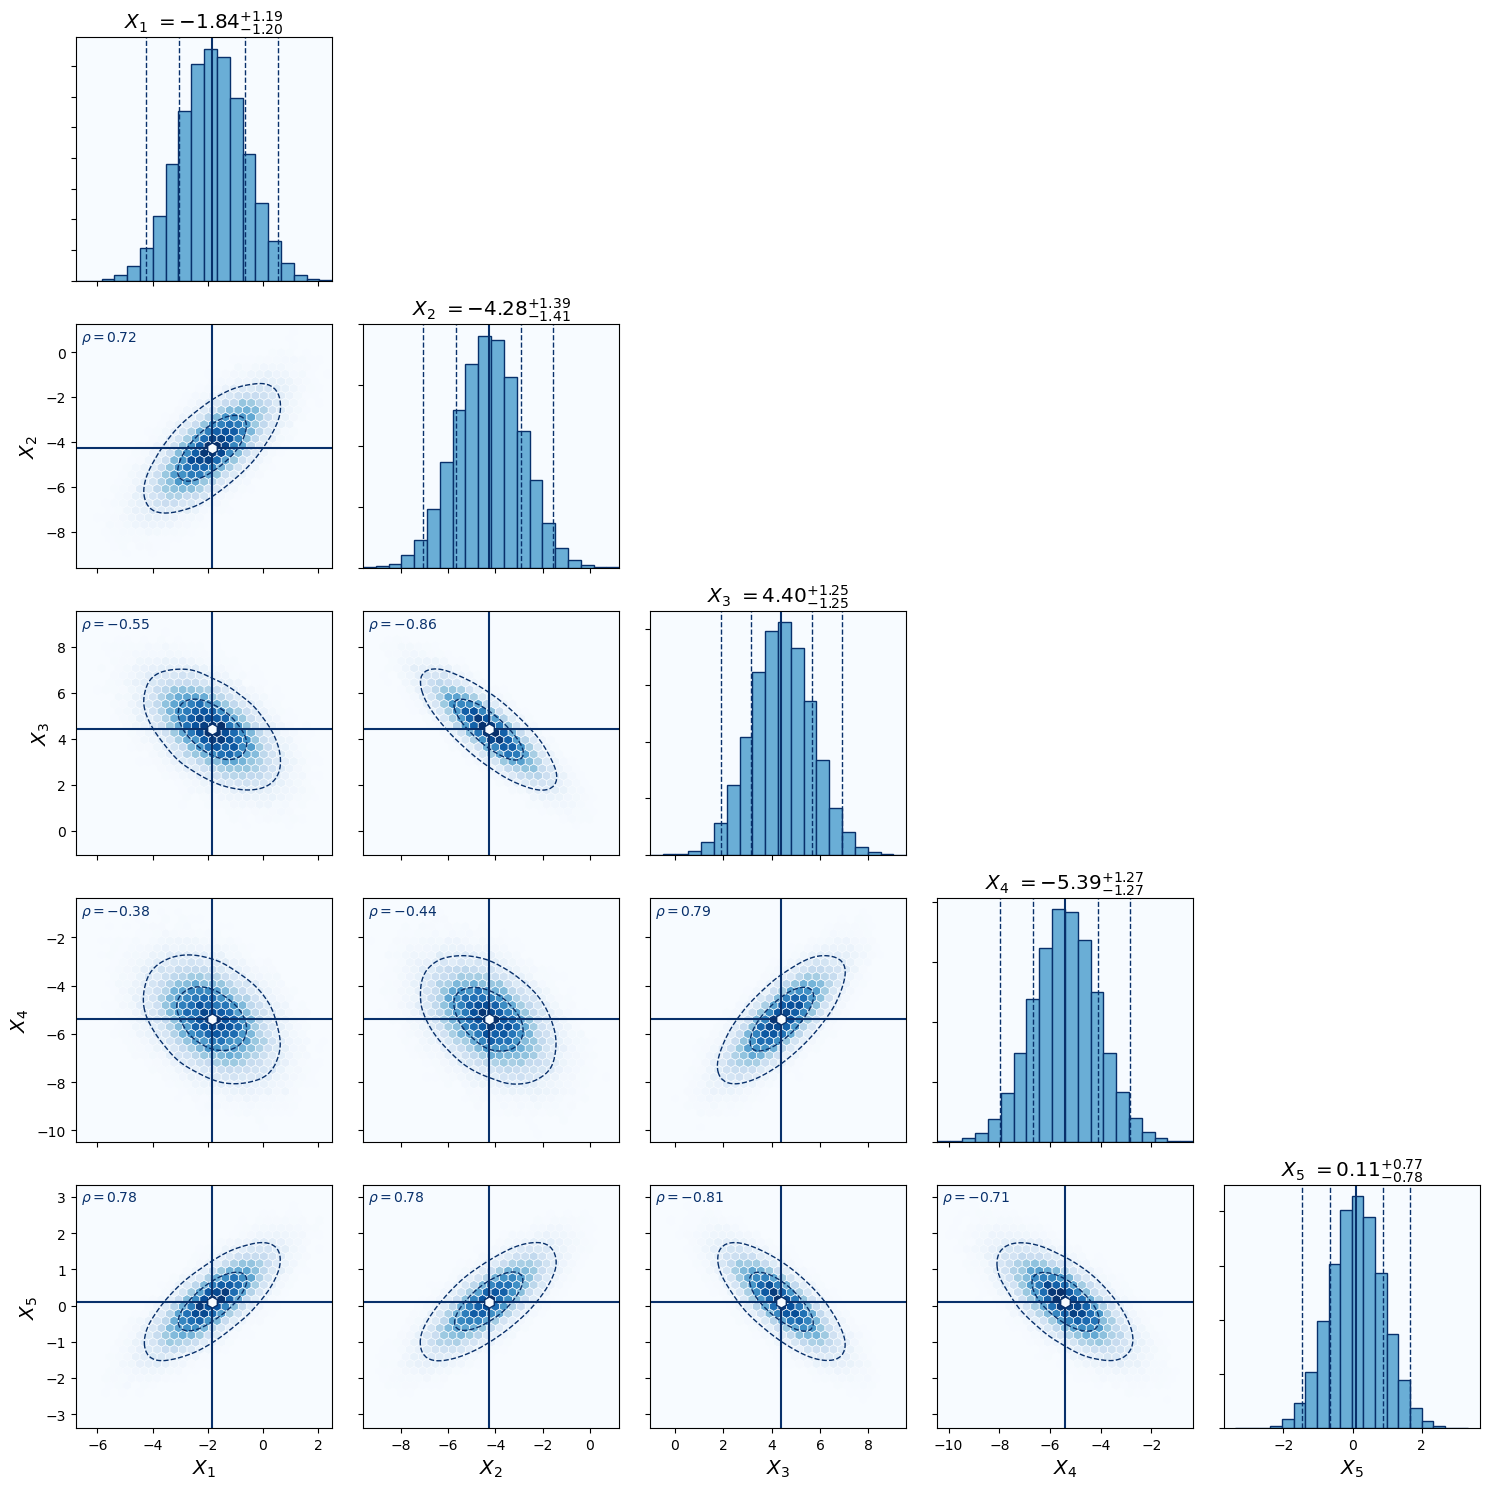

In [12]:
cornerplot(
    data,
    highlight=mean,
    labels=labels,
    show_correlations=True,
    sigma_levels=[1., 2.],
    sigma_smooth=3.,
    title_quantiles=quantiles
);

## Changing colormap

The colormap can be modified by either specifying a string with a valid name of a colormap or by passing a colormap object itself. The colors of line will be changed accordingly.

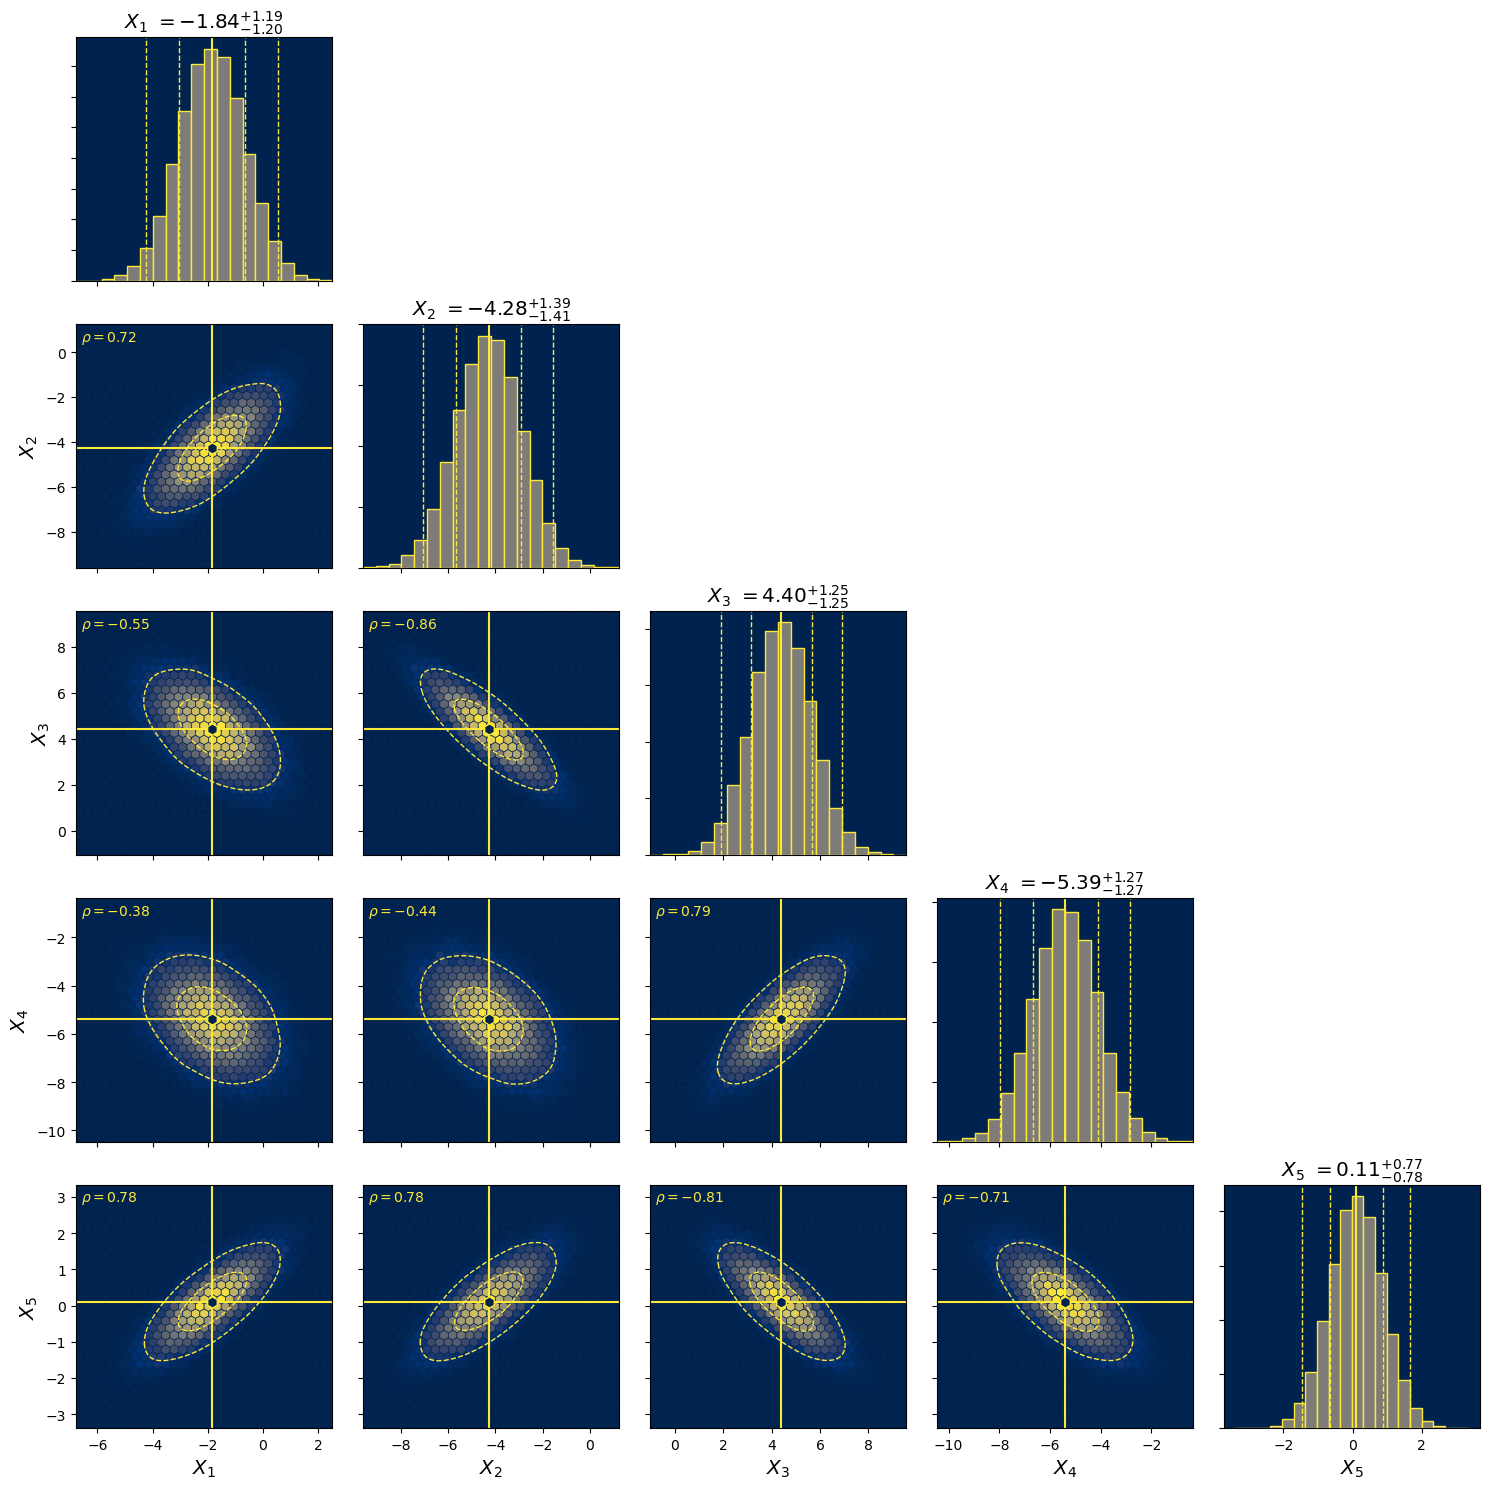

In [13]:
cornerplot(
    data,
    cmap="cividis",
    highlight=mean,
    labels=labels,
    show_correlations=True,
    sigma_levels=[1., 2.],
    sigma_smooth=3.,
    title_quantiles=quantiles
);

## Changing line and textcolor

The edge-, face- and background colors of the histograms, the linecolors of the $\sigma$ contours and the highlights, as well as the textcolor of the correlation coefficients adapt to the chosen colormap. Additionally they can be specified as well.

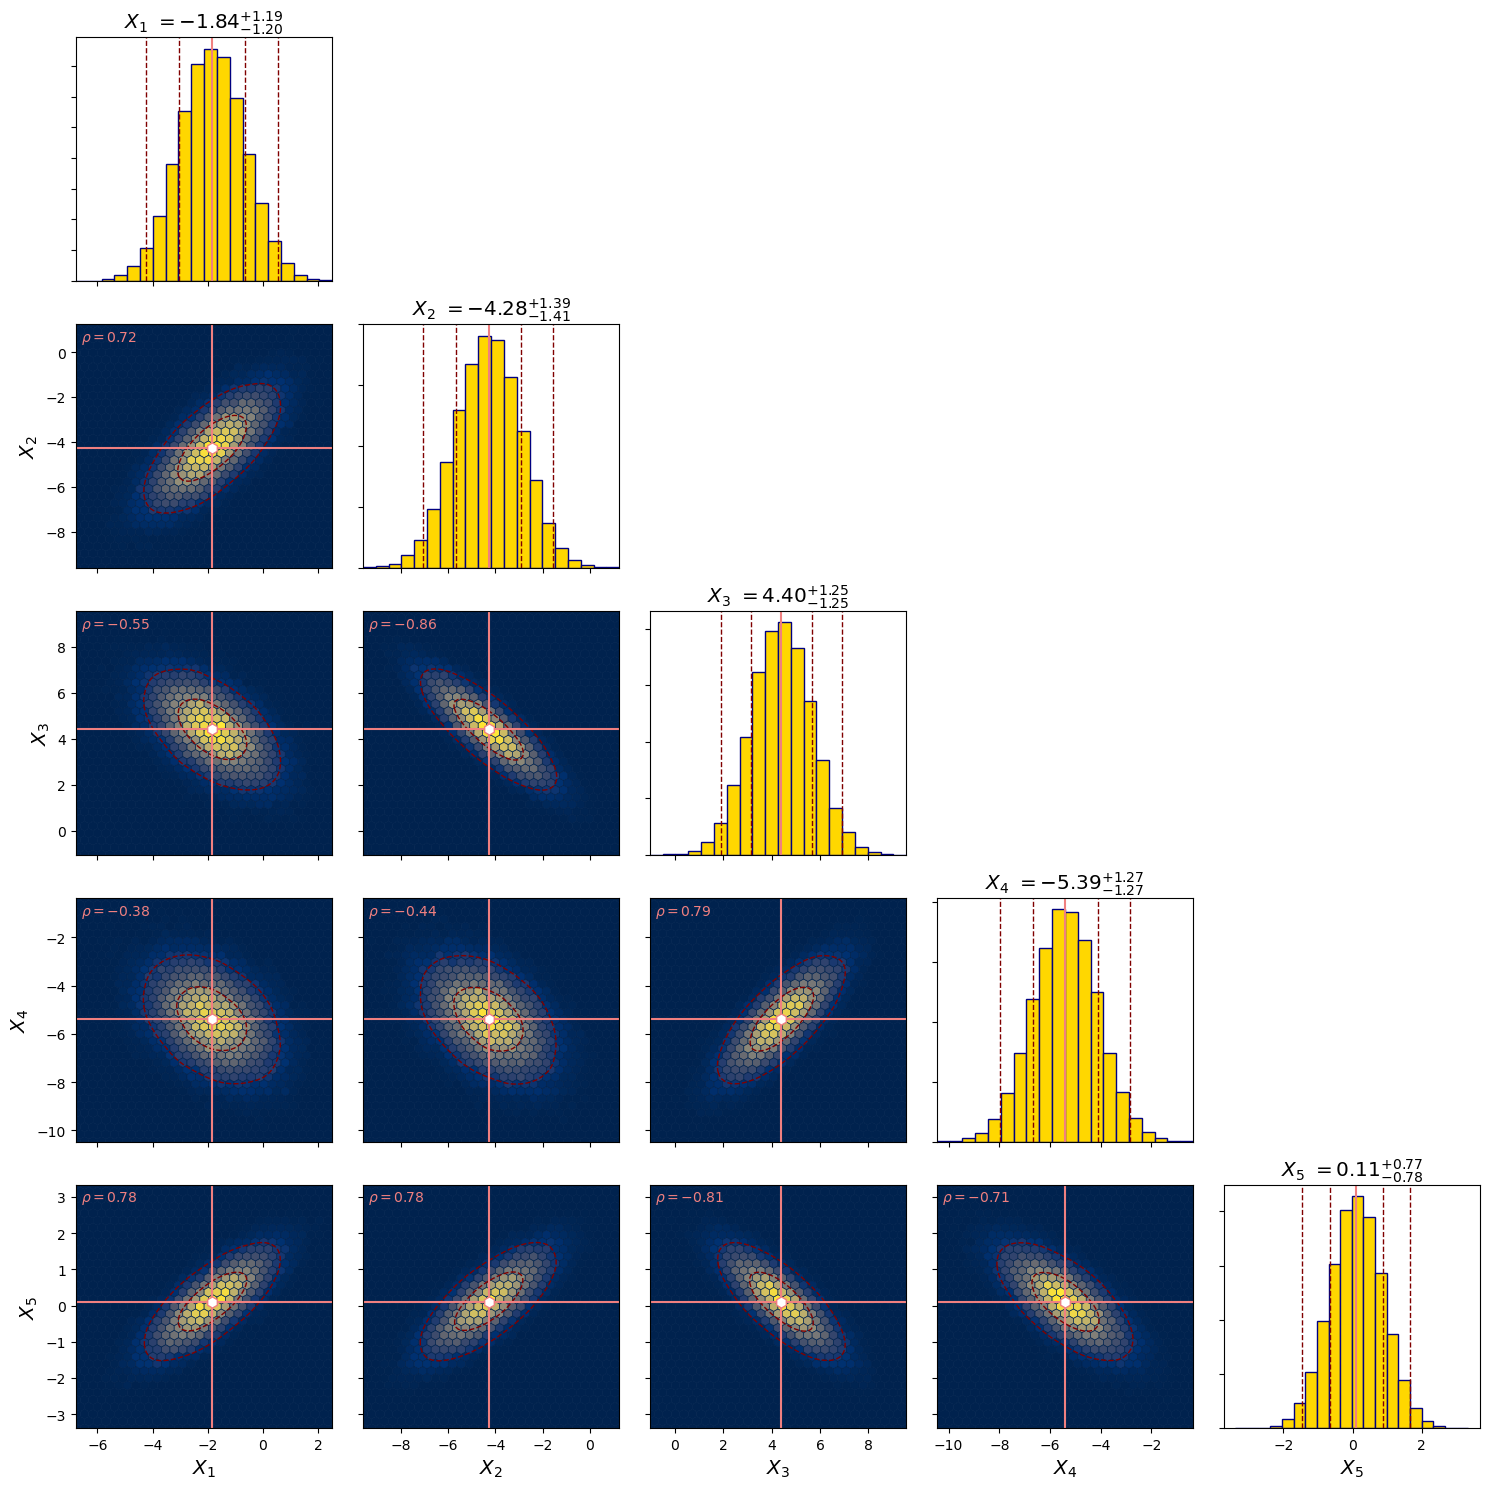

In [14]:
cornerplot(
    data,
    cmap="cividis",
    correlation_textcolor="lightcoral",
    highlight=mean,
    highlight_linecolor="lightcoral",
    highlight_markercolor="white",
    hist_backgroundcolor="white",
    hist_edgecolor="navy",
    hist_facecolor="gold",
    labels=labels,
    show_correlations=True,
    sigma_levels=[1., 2.],
    sigma_linecolor="maroon",
    sigma_smooth=3.,
    title_quantiles=quantiles
);

Just because you can change the colors, does not mean that you should. It is often best to use a simple color scheme.

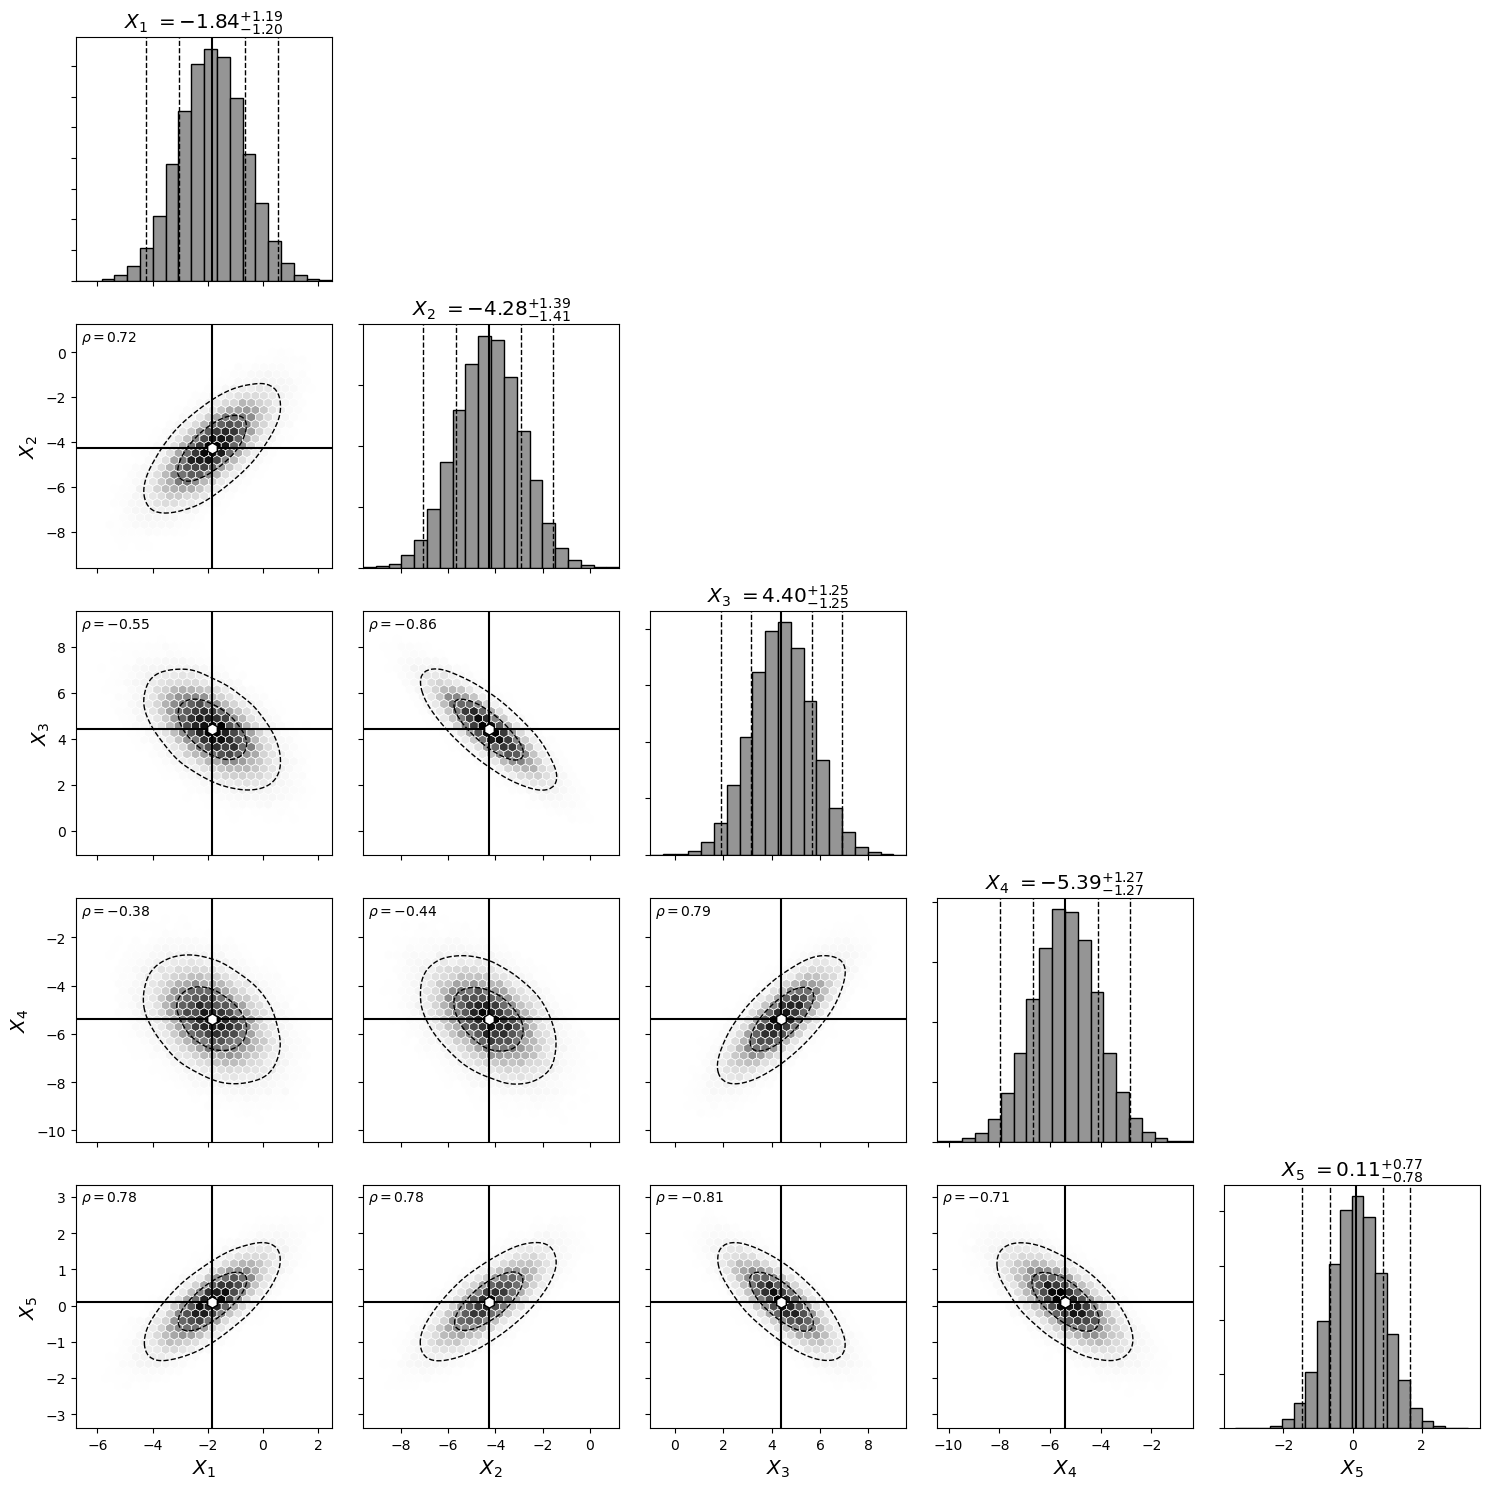

In [15]:
cornerplot(
    data,
    cmap="Greys",
    highlight=mean,
    labels=labels,
    show_correlations=True,
    sigma_levels=[1., 2.],
    sigma_smooth=3.,
    title_quantiles=quantiles
);

## Saving plots

`cornerhex.cornerplot` returns the figure and axes objects of the plots, which can be used to further modify or to save the plot.

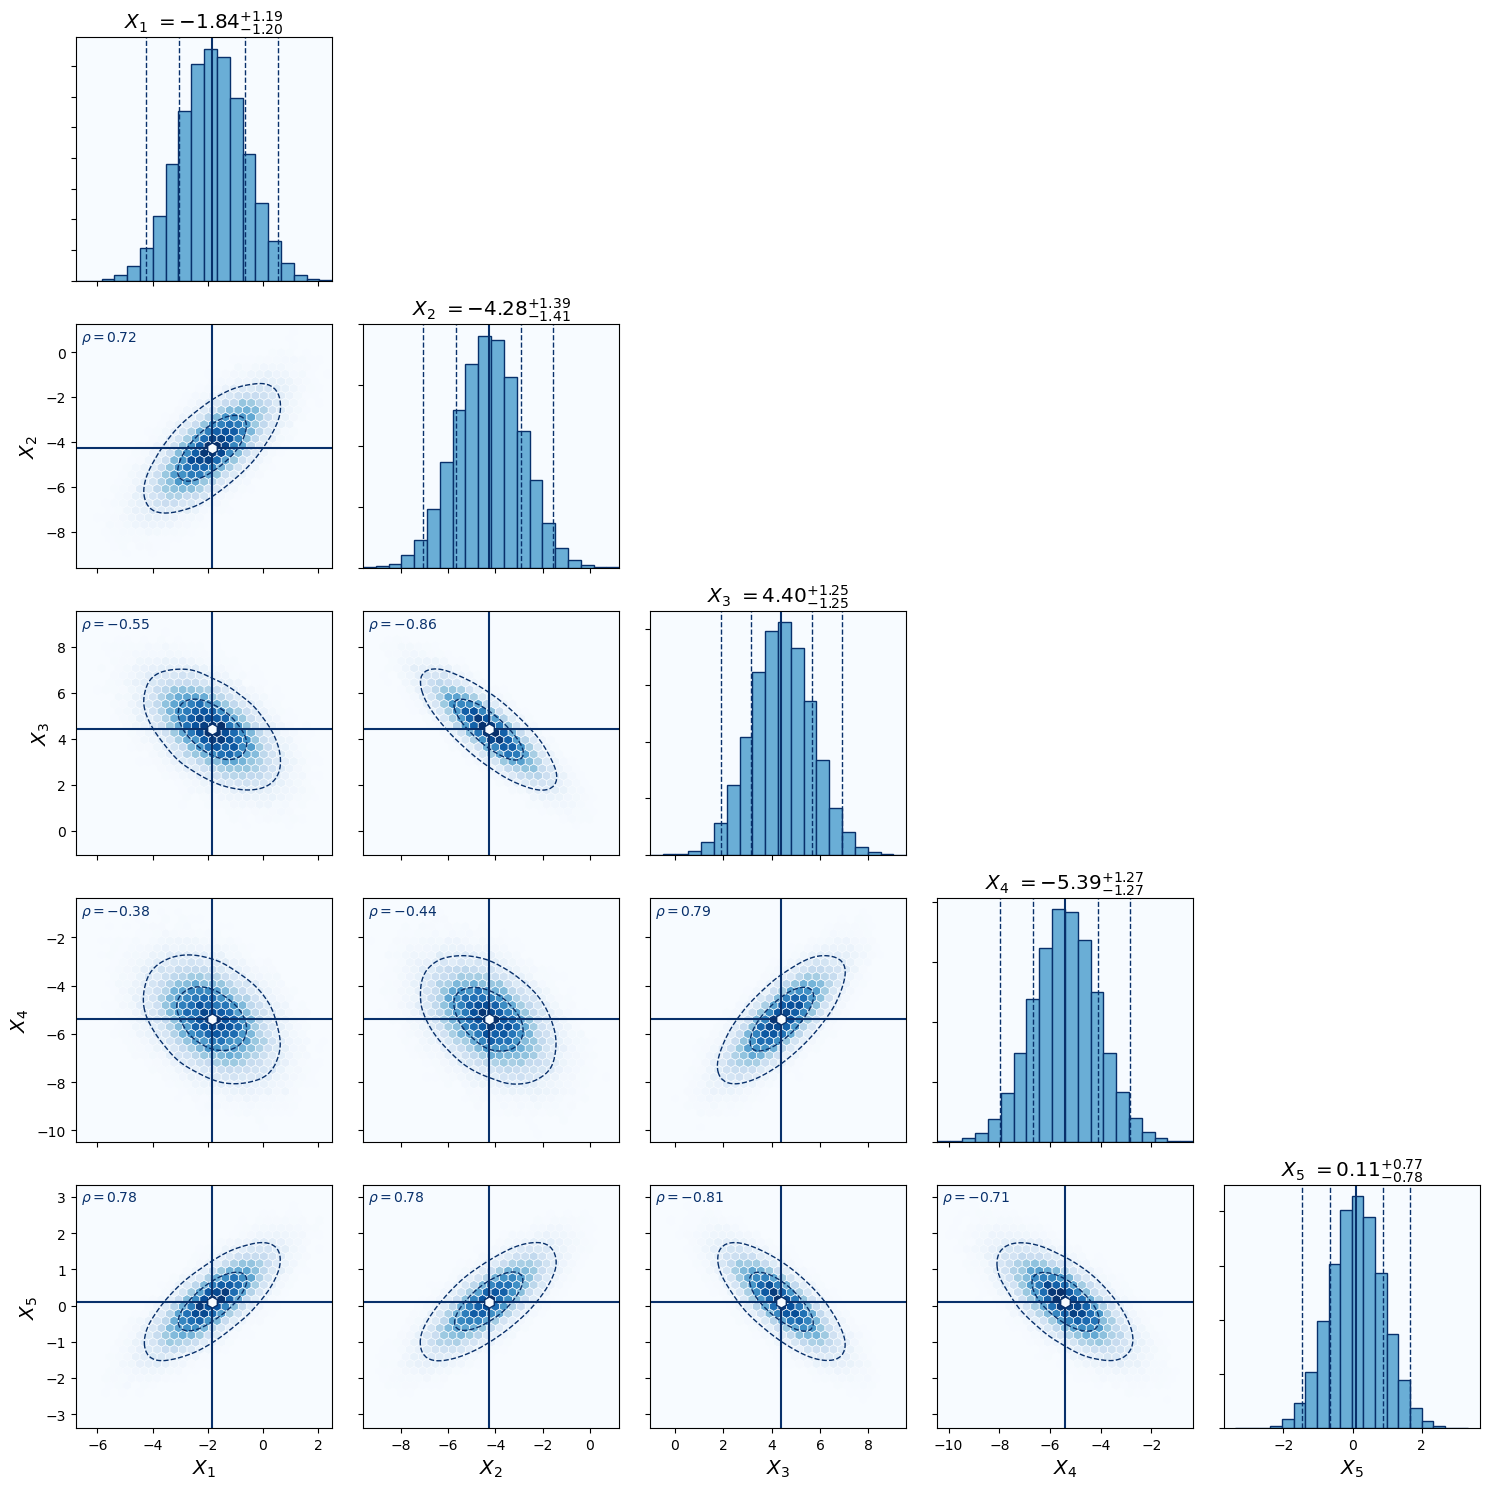

In [16]:
fig, ax = cornerplot(
    data,
    highlight=mean,
    labels=labels,
    show_correlations=True,
    sigma_levels=[1., 2.],
    sigma_smooth=3.,
    title_quantiles=quantiles
);

In [17]:
fig.savefig("cornerhex.pdf")